Mean Squared Error (MSE): 1354.752342027794
R-squared (R2) Score: 0.9999718752675846


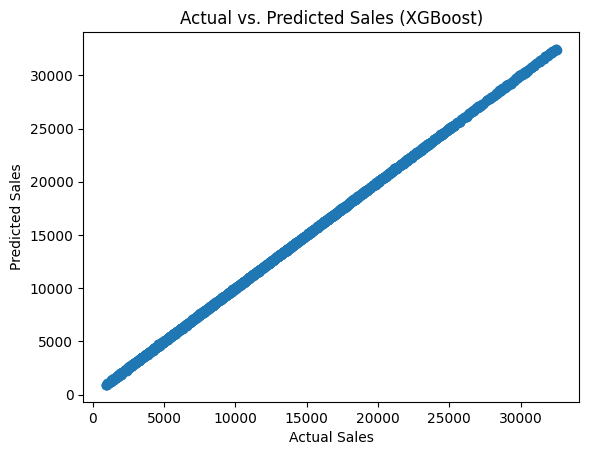

Predicted Sales for New Data: [ 3192.951  4419.376 21642.207 14227.314]


In [1]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the sales data (replace 'data.csv' with your dataset)
data = pd.read_csv('/content/statsfinal.csv')

# Define the target variable (sales) and features (independent variables)
X = data[['Q-P1', 'Q-P2', 'Q-P3','Q-P4']]
y = data[['S-P1','S-P2','S-P3','S-P4']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (XGBoost)")
plt.show()

# Make predictions for future data
new_data = pd.DataFrame({'Q-P1': [1000], 'Q-P2': [698], 'Q-P3': [4000], 'Q-P4' : [3475]})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales for New Data: {predicted_sales[0]}")
